In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
covid_df = pd.read_csv('covid_19_india.csv')

In [3]:
individual_df = pd.read_csv('IndividualDetails.csv')

In [4]:
pop_df = pd.read_csv('population_india_census2011.csv')

In [5]:
pop_df = pop_df.rename(columns = {"State / Union Territory": "detected_state"})
pop_df.head()

,Sno,detected_state,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [7]:
individual_df['age'].fillna(24)
individual_df["age"] = individual_df["age"].astype(str)
individual_df['age'] = individual_df['age'].apply(lambda x : 24 if x=="nan"  else x)
individual_df['age'] = individual_df['age'].apply(pd.to_numeric) 
individual_df = individual_df.assign(age_group = individual_df['age']//10)
individual_df.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes,Unnamed: 12,age_group
0,0,KL-TS-P1,30/01/2020,24,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan,NaN,2
1,1,KL-AL-P1,02/02/2020,24,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan,NaN,2
2,2,KL-KS-P1,03/02/2020,24,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan,NaN,2
3,3,DL-P1,02/03/2020,24,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy",NaN,2
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,2


In [36]:
individual_df['diagnosed_date'] = pd.to_datetime(individual_df['diagnosed_date'],dayfirst=True)
individual_df['status_change_date'] = pd.to_datetime(individual_df['status_change_date'], dayfirst=True)
individual_df = individual_df.assign(days_to_change = individual_df['status_change_date'] - individual_df['diagnosed_date'])
individual_df["days_to_change"]= individual_df["days_to_change"].apply(lambda x : x.days//5)
individual_df.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes,Unnamed: 12,age_group,days_to_change
0,0,KL-TS-P1,2020-01-30,24,0,Thrissur,Thrissur,b'Kerala',India,Recovered,2020-02-14,Travelled from Wuhan,NaN,2,3.0
1,1,KL-AL-P1,2020-02-02,24,1,Alappuzha,Alappuzha,b'Kerala',India,Recovered,2020-02-14,Travelled from Wuhan,NaN,2,2.0
2,2,KL-KS-P1,2020-02-03,24,1,Kasaragod,Kasaragod,b'Kerala',India,Recovered,2020-02-14,Travelled from Wuhan,NaN,2,2.0
3,3,DL-P1,2020-03-02,24,1,East Delhi (Mayur Vihar),East Delhi,b'Delhi',India,Recovered,2020-03-15,"Travelled from Austria, Italy",NaN,2,2.0
4,4,TS-P1,2020-03-02,24,1,Hyderabad,Hyderabad,b'Telangana',India,Recovered,2020-03-02,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,2,0.0


In [34]:
pop_df = pop_df.rename(columns = {"State / Union Territory": "detected_state"}) 
df = pd.merge(individual_df, pop_df[['detected_state','Density']], how='inner', on='detected_state')

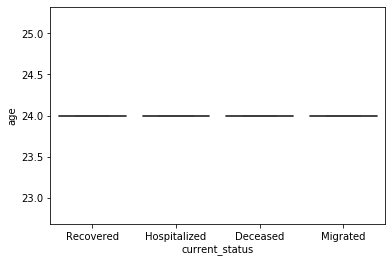

In [35]:
sns.boxplot(y="age", x="current_status", data=individual_df)

In [37]:
df = individual_df

df["detected_state"]= df["detected_state"].astype('|S')
df['gender'] = df['gender'].apply(lambda x : 0 if x is 'F' else 1)
df = df.drop(['government_id','detected_district','nationality','age','id',
              'government_id','Unnamed: 12','status_change_date','diagnosed_date','detected_city'], axis = 1)
df.head()
df.dtypes

gender              int64
detected_state     object
current_status     object
notes              object
age_group           int64
days_to_change    float64
dtype: object

In [38]:
def assignCat(row) :
    
    if row['days_to_change'] > 2 and row['current_status'] == "Recovered" : 
        return 2
    elif row['current_status'] == "Deceased":
        return 1
    else :
        return 3

In [39]:
df['category'] = df.apply(lambda row : assignCat(row), axis = 1) 
df.head()

,gender,detected_state,current_status,notes,age_group,days_to_change,category
0,1,b'Kerala',Recovered,Travelled from Wuhan,2,3.0,2
1,1,b'Kerala',Recovered,Travelled from Wuhan,2,2.0,3
2,1,b'Kerala',Recovered,Travelled from Wuhan,2,2.0,3
3,1,b'Delhi',Recovered,"Travelled from Austria, Italy",2,2.0,3
4,1,b'Telangana',Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",2,0.0,3


# Adding Notes Category

In [27]:
import re
df['notes_category'] =  df['notes']






index = {
    "suspect":['mumbai','delhi','mh','up','maharastra','kerala','chennai','patient'],
    "high_risk":['airport','foreign','confirmed','dubai','iran','bahrain','us','covid','wuhan','china','uae','kenya','italy','spain','positive','hospital','saudi','thailand','usa','france','germany','uk','london','qatar','paris','lanka','middle','east','hospital','admitted','turkey','mecca','mexico','japan','indonesian','indonesia','philippines','singapore'],
}


for i,note in enumerate(df['notes'].astype('str')):
    df['notes_category'][i] = 'safe'
    words = note.strip().split(' ')
    for word in words:
        word = word.strip(',').lower()
        if word in index['suspect']:
            df['notes_category'][i] = 'suspect'
            break
        elif word in index['high_risk']:
            df['notes_category'][i] = 'high_risk'
            break
        else:
            rexp = re.compile(r"P[0-9]+$")
            if rexp.search(word):
                df['notes_category'][i] = 'suspect'
                break
    

print(df.head())


/home/ritwik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/ritwik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ritwik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   gender detected_state current_status  \
0       0      b'Kerala'      Recovered   
1       1      b'Kerala'      Recovered   
2       1      b'Kerala'      Recovered   
3       1       b'Delhi'      Recovered   
4       1   b'Telangana'      Recovered   

                                               notes  age_group notes_category  
0                               Travelled from Wuhan          2      high_risk  
1                               Travelled from Wuhan          2      high_risk  
2                               Travelled from Wuhan          2      high_risk  
3                      Travelled from Austria, Italy          2      high_risk  
4  Travelled from Dubai to Bangalore on 20th Feb,...          2      high_risk  


# Adding Symptoms and Symptoms Category

In [47]:
df['Symptoms'] = df['category']
df['Symptoms_category'] = df['category']

index = {
    'suspect':['mild fever','cold','flu','dizzyness','strong headache','dehydration'],
    'high_risk':['dry cough','breathlessness','high fever']
}



from random import random

print()


for i,symptom in enumerate(df['Symptoms']):
    if df['category'][i] == 1:
        df['Symptoms_category'][i] = 'High_risk'
        
        no_of_symptoms = int(random()*100%4)
        symptoms = ''
        for j in range(0,no_of_symptoms):
            symptoms = symptoms + index['high_risk'][j] + ','
            
        symptoms = symptoms[:-1]
        df['Symptoms'][i] = symptoms
        
    elif df['category'][i] == 2:
        df['Symptoms_category'] = 'Suspect'
        no_of_symptoms = int(random()*100%7)
        symptoms = ''
        for j in range(0,no_of_symptoms):
            symptoms = symptoms + index['suspect'][j] + ','
            
        symptoms = symptoms[:-1]
        df['Symptoms'][i] = symptoms
        
    else:
        df['Symptoms'][i] = 'No flu Symptoms'
        df['Symptoms_category'][i] = 'Safe'
        
        
df.head()

/home/ritwik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ritwik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ritwik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ritwik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: Se

,gender,detected_state,current_status,notes,age_group,days_to_change,category,Symptoms,Symptoms_category
0,1,b'Kerala',Recovered,Travelled from Wuhan,2,3.0,2,mild fever,Suspect
1,1,b'Kerala',Recovered,Travelled from Wuhan,2,2.0,3,"No flu Symptoms,Safe",Suspect
2,1,b'Kerala',Recovered,Travelled from Wuhan,2,2.0,3,"No flu Symptoms,Safe",Suspect
3,1,b'Delhi',Recovered,"Travelled from Austria, Italy",2,2.0,3,"No flu Symptoms,Safe",Suspect
4,1,b'Telangana',Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",2,0.0,3,"No flu Symptoms,Safe",Suspect


In [42]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics 

In [28]:
df.count(axis='index')

gender            3671
detected_state    3671
current_status    3671
notes             2640
age_group         3671
notes_category    3671
dtype: int64

In [29]:
# store the feature matrix (X) and response vector (y) 
X = df.loc[:,:'days_to_change']


print(X)
y = df['category'] 

# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
  
# training the model on training set 
gnb = MultinomialNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


KeyError: 'days_to_change'

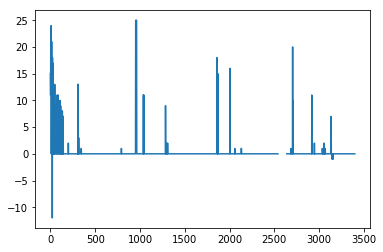

In [11]:
plt.plot(df["days_to_change"])
plt.show()


In [35]:
individual_df.to_csv('file1.csv') 

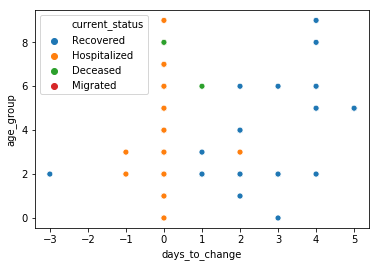

In [16]:
sns.scatterplot(y='age_group',x='days_to_change',hue='current_status',data=df)

In [66]:
df.describe()

,age_group,days_to_change
count,3399.000000,3298.000000
mean,2.378347,0.344754
std,1.065186,2.423911
min,0.000000,-12.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,9.000000,25.000000


In [71]:
df[df['current_status'] == 'Deceased']

,diagnosed_date,gender,detected_city,detected_state,current_status,status_change_date,notes,Unnamed: 12,age_group,days_to_change,Density
63,2020-03-22,M,,Kerala,Deceased,2020-03-28,Travelled from Dubai,NaN,6.0,6.0,"859/km2 (2,220/sq mi)"
200,2020-03-29,M,NaN,Kerala,Deceased,2020-03-31,Details awaited,NaN,6.0,2.0,"859/km2 (2,220/sq mi)"
311,2020-03-12,F,Janakpuri,Delhi,Deceased,2020-03-12,Mother of P64,NaN,6.0,0.0,"11,297/km2 (29,260/sq mi)"
793,2020-03-26,NaN,NaN,Rajasthan,Deceased,2020-03-27,Details Awaited,NaN,2.0,1.0,201/km2 (520/sq mi)
1294,2020-03-23,M,Madurai,Tamil Nadu,Deceased,2020-03-25,Annanagar at Rajaji Hosp. No mention of travel...,NaN,5.0,2.0,"555/km2 (1,440/sq mi)"
1772,2020-03-24,M,NaN,Jammu and Kashmir,Deceased,2020-03-24,Travel History (attended religious event),NaN,6.0,0.0,98/km2 (250/sq mi)
1865,2020-03-12,M,Kalaburagi,Karnataka,Deceased,2020-03-12,"Travelled from Saudi on Feb 29, First death in...",NaN,7.0,0.0,319/km2 (830/sq mi)
1912,2020-03-26,F,NaN,Karnataka,Deceased,2020-03-26,"Travelled from Mecca, Saudi Arabia, details aw...",NaN,7.0,0.0,319/km2 (830/sq mi)
1919,2020-03-27,M,Tumkur,Karnataka,Deceased,2020-03-27,History of travel to Delhi,NaN,6.0,0.0,319/km2 (830/sq mi)
1984,2020-04-03,M,NaN,Karnataka,Deceased,2020-04-03,NaN,NaN,7.0,0.0,319/km2 (830/sq mi)
